In [1]:
%matplotlib inline
from pymongo import MongoClient
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as mstyle
mstyle.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
db=MongoClient(host='localhost',port=27017).mydb.cwdb
df = pd.DataFrame(list(db.find({'marker': {'$eq': 'Brent'}}).sort([('date', pymongo.ASCENDING)])))

In [19]:
df.head()

,_id,date,marker,price
0,5ec5c543b7eaea4afe87878d,1987-05-20,Brent,18.63
1,5ec5c543b7eaea4afe87878e,1987-05-21,Brent,18.45
2,5ec5c543b7eaea4afe87878f,1987-05-22,Brent,18.55
3,5ec5c543b7eaea4afe878790,1987-05-25,Brent,18.60
4,5ec5c543b7eaea4afe878791,1987-05-26,Brent,18.63


## Залежність ЗП від посади для  Python-розробників

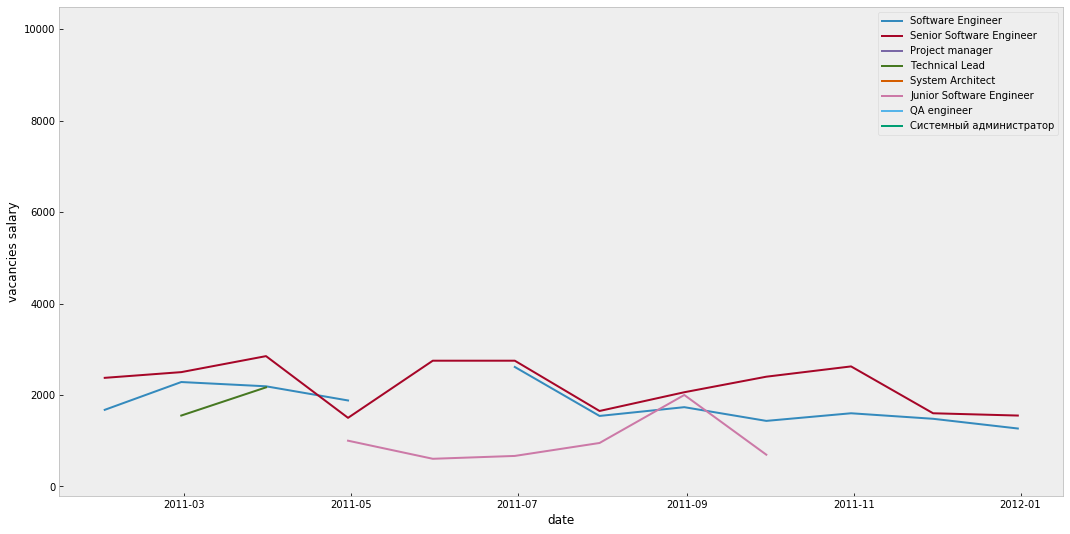

In [4]:
df.set_index('publication_date', drop=False, inplace=True)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')
fig, ax = plt.subplots(figsize=(18, 9))
for position in df['position'].unique():
    subDf = df[df['position'] == position]
    subDf = subDf.resample('M').mean()
    ax.plot(subDf['salary'], label=position)
ax.legend(loc='best')
ax.set(xlabel='date', ylabel='vacancies salary', title='')
ax.grid()
plt.show()

## Лінія регресіі залежності ЗП від досвіду роботи

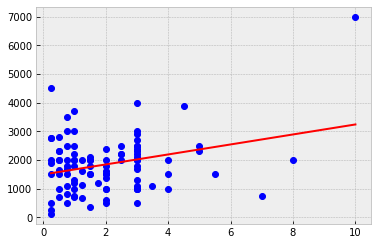

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
edf=df[df['salary']<8000]
y= edf['salary']
x = edf['experience']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,100)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [6]:
df=pd.DataFrame(list(db.find()))

## Розподіл кількості вакансій за очікуваною ЗП

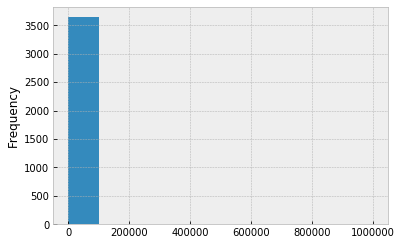

In [7]:
df['salary'].plot.hist(bins=10)

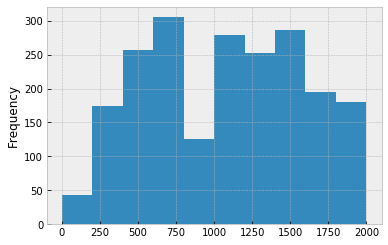

In [8]:
df[df['salary']<2000]['salary'].plot.hist(bins=10)

## Динаміка росту кількості вакансій за вказаною мовою програмування

/Users/a1/.local/share/virtualenvs/3-2-course-work-db-master-PlpU3n1F/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  


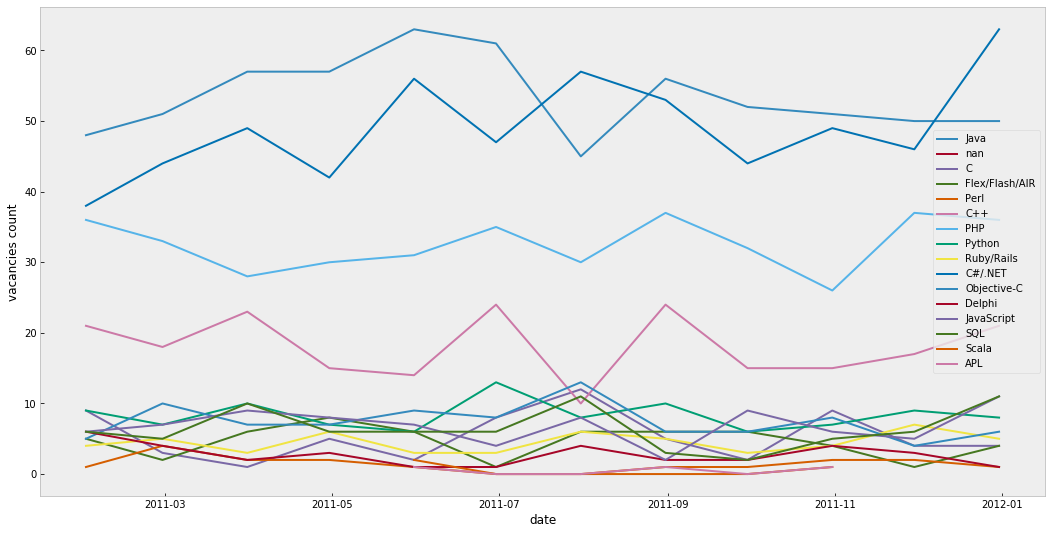

In [9]:
df.set_index('publication_date', drop=False, inplace=True)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M')
fig, ax = plt.subplots(figsize=(18, 9))
for lang in df['language'].unique():
    subDf = df[df['language'] == lang]
    subDf = subDf.resample('M').agg({'count':'size'})
    ax.plot(subDf['count'], label=lang)
ax.legend(loc='best')
ax.set(xlabel='date', ylabel='vacancies count', title='')
ax.grid()
plt.show()

## Кругова діаграма відсотку вакансій на кожну мову програмування

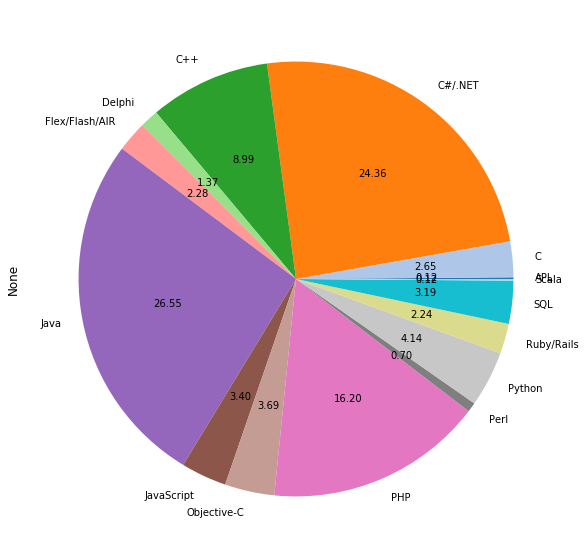

In [10]:
a=df.groupby('language').size()
a.plot.pie(figsize=(10,10),autopct='%.2f',colormap='tab20')

In [11]:
 query = db.aggregate([
        {
            '$group': {
                '_id': {
                    'size': "$company_size",
                    'year': {
                        '$year': "$publication_date"
                    },
                },
                "size": {'$last': "$company_size"},
                'year': {'$last': {'$year': "$publication_date"}},
                'vacancies': {'$sum': 1}
            },
        }
    ])
df = pd.DataFrame(list(query))
df.head()

,_id,size,vacancies,year
0,"{'size': 100, 'year': 2011}",100,758,2011
1,"{'size': 1000, 'year': 2011}",1000,558,2011
2,"{'size': 200, 'year': 2011}",200,578,2011
3,"{'size': 10, 'year': 2011}",10,823,2011
4,"{'size': 50, 'year': 2011}",50,925,2011


## Розподіл кількості вакансій опублікованих компаніями різного розміру в залежності за роками

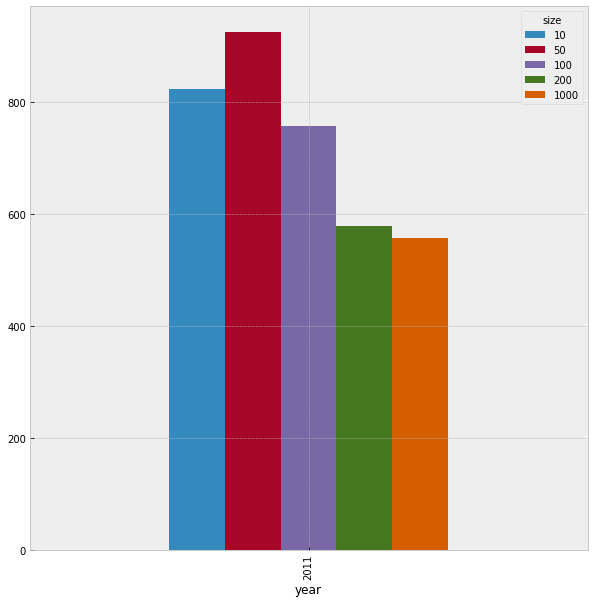

In [12]:
df = df.pivot(index='year', columns='size', values='vacancies')
df.plot.bar(figsize=(10,10))

## Залежність ЗП у ваканції для фахівця з менше ніж 2 рік роботи в залежності від розміру компаніі

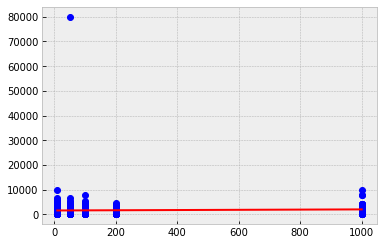

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

df=pd.DataFrame(list(db.find({'experience':{'$lte':2}})))
y= df['salary']
x = df['company_size']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,100)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()